# Homework 2 (Due Sep. 27) 
Problems marked with a (\*) are only required for graduate students.  Undergrads may undertake them for extra credit worth half the problems point value, with no penalties incurred for an incorrect answer.

## 1. Bayesian Networks/Conditional Probability

Consider three binary variables $a, b, c \in \{0, 1\}$ having the joint distribution given by  

In [90]:
import numpy as np
#        | a | b | c | P(a,b,c)
P_table = (
np.array([[0,  0,  0,  0.192 ],
          [0,  0,  1,  0.144 ],
          [0,  1,  0,  0.048 ],
          [0,  1,  1,  0.216 ],
          [1,  0,  0,  0.192 ],
          [1,  0,  1,  0.064 ],
          [1,  1,  0,  0.048 ],
          [1,  1,  1,  0.096 ]]))

# Convert P_table (which is a probability table) to a probability array, which 
# is much more computationally sensible for a discrete valued distribution
P_abc = np.zeros((2,2,2))
for entry in P_table:
    a = int(entry[0])
    b = int(entry[1])
    c = int(entry[2])
    P = entry[3]
    P_abc[a,b,c] = P

Note that you may want to use the following functions to help you in the following problem:

In [91]:
def marginalize(P,variables_to_marginalize=(),keepdims=False):
    """ Marginalize a probability table, i.e. compute P(a,b) = sum_c P(a,b,c) 
    
        Arguments: 
        
        P (array) -> a probability array in which the dimensions correspond to random variables,
                     the indices to variable values, and the entries to probabilities
        variables_to_marginalize (tuple) -> a list of integers containing the 
                                    variable numbers to marginalize over
        keepdims (boolean) -> Marginalization reduces the dimensionality of the distribution.  keepdims=False
                       removes that dimension from the array indexing scheme.  For example P(a,b,c) has
                       an array that is 2x2x2.  If we marginalize over variable/index 1 (aka b), then the 
                       resulting array P(a,c) is 2x2 if keepdims=False (which may change the index of a 
                       given variable.  For example, after marginalizing, variable/index 1 is now c).  
                       Conversely, the array becomes 2x1x2 if keepdims=True.
    
    """
    # Sum over the axes given in variables_to_marginalize
    return np.sum(P,axis=variables_to_marginalize,keepdims=keepdims)

def condition(P,variables_to_condition=()):
    """ Condition a probability table, i.e. compute P(a|c) = P(a,c)/P(c) 
    
        Arguments: 
        
        P (array) -> a probability array in which the dimensions correspond to random variables,
                     the indices to variable values, and the entries to probabilities
        variables_to_condition (tuple) -> a list of integers containing the variables to condition on
        
        NOTE: This function always returns an array that is the same size as the input.  However, this array
        no longer sums to one as does an unconditioned joint distribution.  Instead, it sums to one only given
        a particular value of the conditioned variable/index.  For example:
        
        P_abc.sum()==1 -> True
        P_ab_given_c = condition(P_abc,variables_to_condition=(2,))
        P_ab_given_c.sum()==1 -> False
        P_ab_given_c[:,:,0].sum()==1 -> True
        P_ab_given_c[:,:,1].sum()==1 -> True
   
    """
    # find the variables to marginalize over to get the marginal distribuion of the
    # variables that we wish to condition on
    v_to_m = list(range(P.ndim))
    for v in variables_to_condition:
        v_to_m.remove(v)
    # Compute the conditional by dividing the input by the output
    return P/marginalize(P,variables_to_marginalize=tuple(v_to_m),keepdims=True)
    
P_ab = marginalize(P_abc,variables_to_marginalize=(0,))
P_a_given_b = condition(P_ab,variables_to_condition=(1,))

### Joint distribution equivalency (20 pts)
Show by direct evaluation that $P(a,b,c) = P(a)P(c|a)P(b|c)$ for all values of $a$,$b$, and $c$.

In [103]:
P_a = marginalize(P_abc,variables_to_marginalize=(1,2))
P_ca = marginalize(P_abc, variables_to_marginalize=(1,))
P_c_given_a = condition(P_ca, variables_to_condition=(0,))
P_bc = marginalize(P_abc,variables_to_marginalize=(0,))
P_b_given_c = condition(P_bc, variables_to_condition=(1,))

print("Evaluation for A,B,C equal to:")
print("0,0,0:",P_abc[0][0][0]," = ", P_a[0] * P_c_given_a[0][0] * P_b_given_c[0][0])
print("0,0,1:",P_abc[0][0][1]," = ", P_a[0] * P_c_given_a[1][0] * P_b_given_c[0][1])
print("0,1,0:",P_abc[0][1][0]," = ", P_a[0] * P_c_given_a[0][0] * P_b_given_c[1][0])
print("0,1,1:",P_abc[0][1][1]," = ", P_a[0] * P_c_given_a[1][0] * P_b_given_c[1][1])
print("1,0,0:",P_abc[1][0][0]," = ", P_a[1] * P_c_given_a[0][1] * P_b_given_c[0][0])
print("1,0,1:",P_abc[1][0][1]," = ", P_a[1] * P_c_given_a[1][1] * P_b_given_c[0][1])
print("1,1,0:",P_abc[1][1][0]," = ", P_a[1] * P_c_given_a[0][1] * P_b_given_c[1][0])
print("1,1,1:",P_abc[1][1][1]," = ", P_a[1] * P_c_given_a[1][1] * P_b_given_c[1][1])

Evaluation for A,B,C equal to:
0,0,0: 0.192  =  0.192
0,0,1: 0.144  =  0.144
0,1,0: 0.048  =  0.048
0,1,1: 0.216  =  0.216
1,0,0: 0.192  =  0.192
1,0,1: 0.064  =  0.064
1,1,0: 0.048  =  0.048
1,1,1: 0.096  =  0.096


(Extra, by proof)
LHS = P(a,b,c) = P(a)P(c|a)P(b|c) = RHS

Starting with LHS:

Use product rule to pull c out (c must be observed for a head-to-tail relationship): $$ \mathrm{LHS} = P(a,b,c) = P(c)*P(a|c)*P(b|c) $$ 

Expand P(a|c) as per Bayes' Theorem:
$$ = P(c)*P(b|c)*\frac{P(c|a)P(a)}{P(c)} $$

You can then cancel the c's, leaving:
$$ = P(a)P(c|a)P(b|c) = \mathrm{RHS} $$ 

### Graph Visualization (10 pts)

Visualize the corresponding directed graph, either using graph software like [networkx](https://networkx.github.io/) or drawing it by hand.

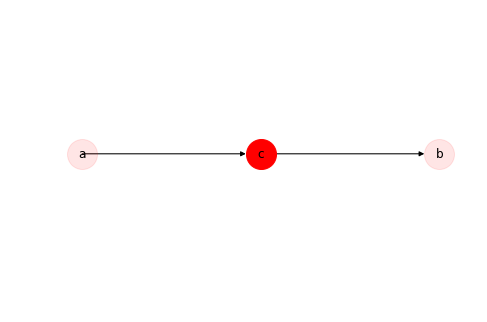

In [104]:
#Head to tail: a -> c -> b (c observed)
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
edges = [("a","c"),("c","b")]
G.add_edges_from(edges)
coords = {"a":(-1,0),"b":(1,0),"c":(0,0)}
nx.draw(G,pos=coords,nodelist=["a","b"],node_size=900,node_color=['r'], with_labels=True,alpha=0.1)
nx.draw(G,pos=coords,nodelist=["c"],node_size=900,node_color=['r'], with_labels=True,alpha=1)
plt.show()

### A Trick Question in Graphs (\*) (10 pts)
Plot the graph associated with
$$
P(A,B,C,D,E) = P(A)P(C)P(B|A,C)P(D|C)P(E|D),
$$
where $A,B,C,D,E \in \{0,1\}$ with conditional probability tables
\begin{align}
P(A=1) &= 0.3 \nonumber \\
P(C=1) &= 0.7 \nonumber \\
P(B=1|A,C) &= \begin{cases} 0.3\,\mathrm{if}\,A=0,C=0\\
                          0.7\,\mathrm{if}\,A=1,C=0\\
                          0.1\,\mathrm{if}\,A=0,C=1\\
                          0.9\,\mathrm{if}\,A=1,C=1 \end{cases} \nonumber \\
P(D=1|C) &= \begin{cases}   0.4\,\mathrm{if}\,C=0\\
                          0.2\,\mathrm{if}\,C=1 \end{cases} \nonumber \\
P(E=1|D) &= \begin{cases}   0.1\,\mathrm{if}\,D=0\\
                          0.1\,\mathrm{if}\,D=1 \end{cases}. \nonumber
\end{align}
Compute the probability $P(A=1|E=1,C=1)$.  Be sure to think carefully about conditional independence before pulling out your calculator.

## 2.Gene Sequence Clustering

### 2a. Training a Markov model (40 pts)
Load the file genes\_training.p, which is available in this homework archive.  genes\_training.p contains 2000 sequences, with each sequence $\mathbf{s}$ consisting of 20 nucleobases $s_i \in \mathrm{Nu},\; \mathrm{Nu} = \{A,T,G,C\}$.  Each of these sequences is generated from one of two separate Markov processes.  The label (aka class) of the process that generated the sequence is given in the dataset. 

Learn the Markov model for each class given the training data.  **To do this, for each class compute the prior probability $\mathbf{\pi}_c$ of each nucleobase (the relative frequency of each nucleobase for each class, a vector of length 4) and the matrix of transition probabilities** 
$$
\mathcal{A}_{c,kj} = P(s_{i+1}=\mathrm{Nu}_j|s_{i}=\mathrm{Nu}_k),
$$ 
which is a 4 by 4 matrix.  As a quick sanity check, each row of $\mathcal{A}_c$ should sum to one.  **Using these priors and transition matrices, write a function that generates a new sequence given the class**, i.e. simulates a data point. 

In [105]:
import pickle
import numpy as np

# Define some useful constants
N_nucleobases = 4
N_classes = 2
nucleobases = ['A','T','G','C']

# Load the training data using pickle
sequences,labels = pickle.load(open('genes_training.p','rb'))

# Initialize the class priors and transition matrices
pi_0 = np.zeros((N_nucleobases))
pi_1 = np.zeros((N_nucleobases))

A_0 = np.zeros((N_nucleobases,N_nucleobases))
A_1 = np.zeros((N_nucleobases,N_nucleobases))

##### Train prior #####

# Loop over all of the sequences and labels
for s,l in zip(sequences,labels):
    sequence_length = len(s)
    counts = [0,0,0,0]
    for p in range(sequence_length):
        #! s is a length 20 sequence of nucleobases.  For all s, count the number of times a given nucleobase appears
        #! and record this information in the appropriate class prior (pi_0 or pi_1)
        if l==0:
            if s[p]=='A':
                pi_0[0]+=1
            if s[p]=='T':
                pi_0[1]+=1
            if s[p]=='G':
                pi_0[2]+=1
            if s[p]=='C':
                pi_0[3]+=1   
        if l==1:
            if s[p]=='A':
                pi_1[0]+=1
            if s[p]=='T':
                pi_1[1]+=1
            if s[p]=='G':
                pi_1[2]+=1
            if s[p]=='C':
                pi_1[3]+=1 
        pass

# Convert from counts to probabilities by normalizing
pi_0/=pi_0.sum()
pi_1/=pi_1.sum()
#print(pi_0)
#print(pi_1)

##### Train transition matrix #####
for s,l in zip(sequences,labels):
    sequence_length = len(s)
    for p in range(sequence_length-1):
        #! s is a length 20 sequence of nucleoboases, for all s, count the number of times that a nucleobase 
        #! transitions to another nucleobase and record this information in the appropriate transition matrix (A_0 or A_1)
        first = s[p]
        if first=='A':
            firstInd=0
        if first=='T':
            firstInd=1
        if first=='G':
            firstInd=2
        if first=='C':
            firstInd=3   
        second = s[p+1]
        if second=='A':
            secInd=0
        if second=='T':
            secInd=1
        if second=='G':
            secInd=2
        if second=='C':
            secInd=3   
        if l==0:
            A_0[firstInd][secInd]+=1
        if l==1:
            A_1[firstInd][secInd]+=1
        pass
    
# Convert from counts to probabilities by row normalization
A_0/=A_0.sum(axis=1)[:,np.newaxis]
A_1/=A_1.sum(axis=1)[:,np.newaxis]
#print(A_0)
#print(A_1)

##### Generate a synthetic sequence #####
def generate_new_sequence(A,pi,n=20):
    """  
    Arguments:
    A -> Nucleobase transition matrix
    pi -> Prior
    n -> length of sequence to generate
    """
    # Draw from the prior for the first nucleobase
    s = [np.random.choice(nucleobases,p=pi)]
    row = 0
    #! Write the code that uses the transition matrix to produce a length n sample
    last = s
    for p in range(n-1):
        if last=='A':
            row = 0
        if last=='T':
            row = 1
        if last=='G':
            row = 2
        if last=='C':
            row = 3
        #then somehow choose what the next letter is based on the probabilities in that row???
        last = [np.random.choice(nucleobases,p=A[row])]
        s += last
    #print(s)
    return s

#seq = generate_new_sequence(A=A_0,pi=pi_0,n=20)
#seq = generate_new_sequence(A=A_1,pi=pi_1,n=20)

### 2b. A Markov classifier (*) (20 pts)


Having the prior and transition probabilities gives you the ability to evaluate the likelihood of a sequence for a given class as:
$$
P(\mathbf{s}) = P(s_1|\mathbf{\pi}_c) \prod_{i=1}^{n-1} P(s_{i+1}|s_{i},\mathcal{A}_c),
$$
where $\mathbf{\pi}_c$ is the class-conditioned prior probability, and $\mathcal{A}_c$ is the class-conditioned transition matrix.  Comparing the computed likelihood for a given sequence between different classes forms the basis of a classifier in a very similar manner to naive Bayes.  The difference this time is that now each random variable depends on the one before it in the sequence, whereas in naive Bayes we assumed that all the random variables were independent.    

Load the file genes\_test.p, which is similar to genes\_training.p.  **For each sequence, compute the likelihood for both classes and assign a label.  Compare this predicted label to the known one, and report the test set accuracy**.  As a point of comparison, my implementation achieved 98.7\% accuracy.  

In [41]:
sequences_test,labels_test = pickle.load(open('genes_test.p','rb'))
sequence_probabilities_0 = []
sequence_probabilities_1 = []
total = 0
correct = 0

for s,l in zip(sequences_test,labels_test):
    #! Write a function that evaluates the probability of class membership for each class by multiplying the 
    #! prior by the likelihood over all symbol transitions
    n = len(s)
    total = len(sequences_test)
    
    #do class 0 first:
    first = s[0]
    if first=='A':
        firstInd=0
    elif first=='T':
        firstInd=1
    elif first=='G':
        firstInd=2
    elif first=='C':
        firstInd=3   
    
    prob0 = pi_0[firstInd]
    for p in range(0,n-1):
        first = s[p]
        if first=='A':
            firstInd=0
        elif first=='T':
            firstInd=1
        elif first=='G':
            firstInd=2
        elif first=='C':
            firstInd=3   
        second = s[p+1]
        if second=='A':
            secInd=0
        elif second=='T':
            secInd=1
        elif second=='G':
            secInd=2
        elif second=='C':
            secInd=3   
        prob0 *= A_0[firstInd][secInd]
    
    #then do class 1:
    first = s[0]
    if first=='A':
        firstInd=0
    elif first=='T':
        firstInd=1
    elif first=='G':
        firstInd=2
    elif first=='C':
        firstInd=3   
    
    prob1 = pi_1[firstInd]
    for p in range(0,n-1):
        first = s[p]
        if first=='A':
            firstInd=0
        elif first=='T':
            firstInd=1
        elif first=='G':
            firstInd=2
        elif first=='C':
            firstInd=3   
        second = s[p+1]
        if second=='A':
            secInd=0
        elif second=='T':
            secInd=1
        elif second=='G':
            secInd=2
        elif second=='C':
            secInd=3   
        prob1 *= A_1[firstInd][secInd]
    
    #print(prob0)
    #print(prob1)
    if prob0 > prob1:
        #print("Probability of class 0 is higher,",prob0)
        if l==0:
            #print("Class is class 0")
            correct+=1
            #print("Correct is ",correct)
    elif prob1 > prob0:
        #print("Probability of class 1 is higher,",prob1)
        if l==1:
            #print("Class is class 1")
            correct+=1
            #print("Correct is ",correct)
    else:
        print("Class probability is the same")
        
pctCorrect = (correct/total) * 100
print("Percent correct:",pctCorrect)


Percent correct: 98.6
